In [34]:
##Load an image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
from pims import Frame
from scipy.misc import imsave
img1 = cv2.imread('u0.png',0) #queryimage # left image
img2 = cv2.imread('v0.png',0) #trainimage # right image


In [35]:
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [36]:
#pts1 = np.int32(pts1)
#pts2 = np.int32(pts2)
pts1 = np.asarray(pts1)
pts2 = np.asarray(pts2)
#print(type(pts2))
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

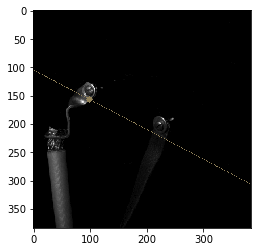

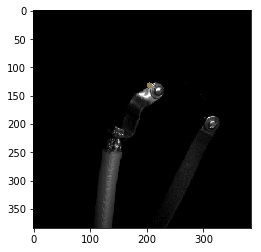

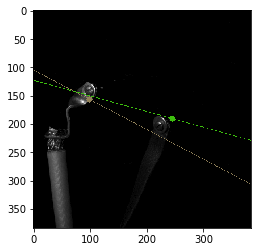

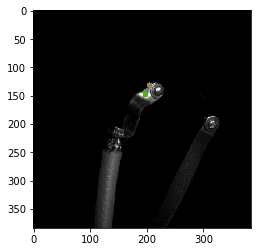

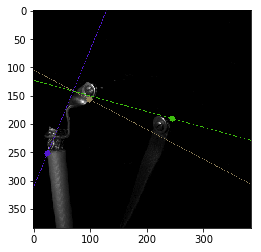

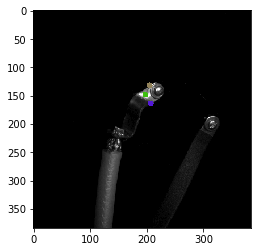

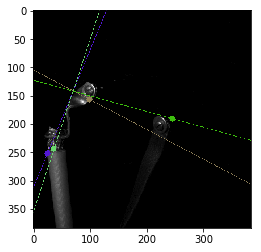

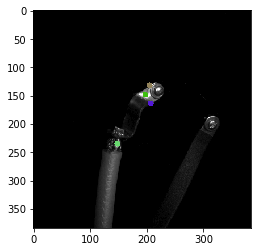

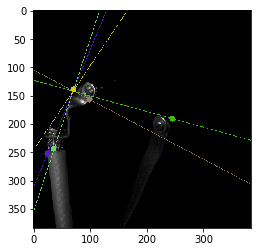

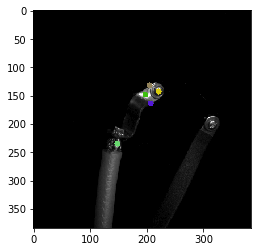

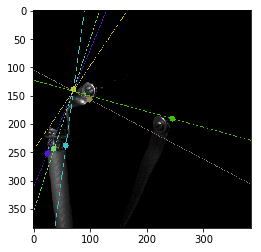

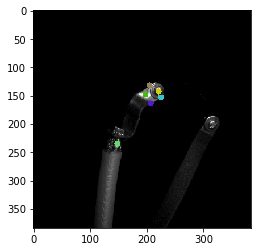

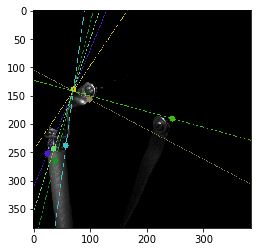

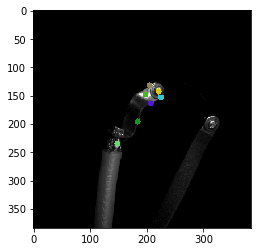

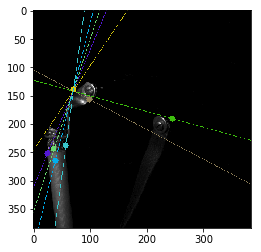

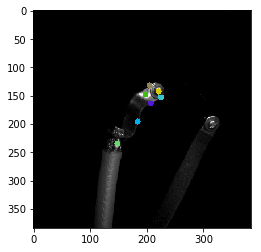

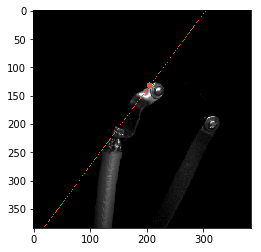

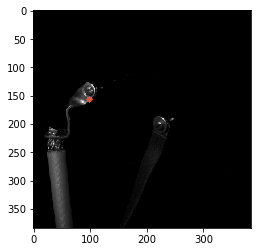

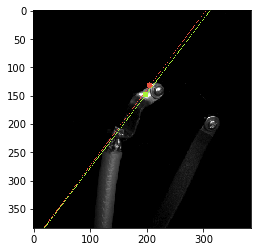

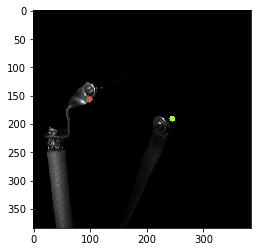

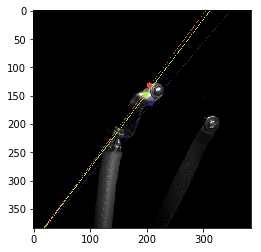

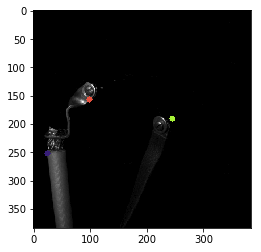

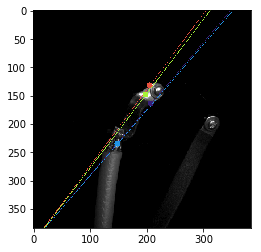

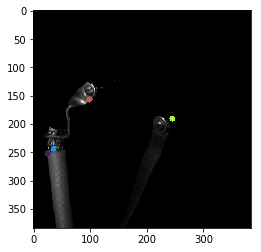

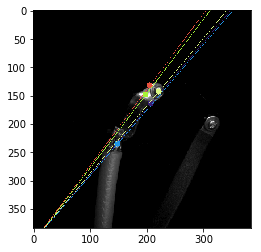

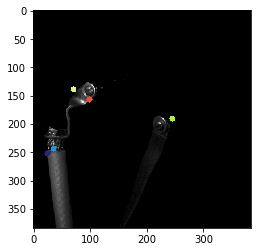

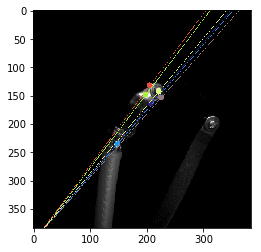

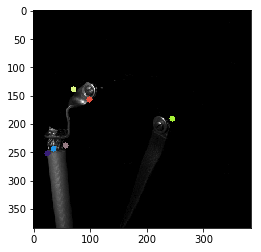

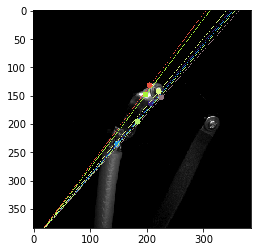

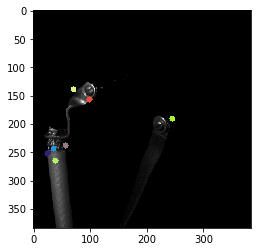

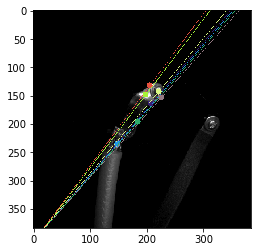

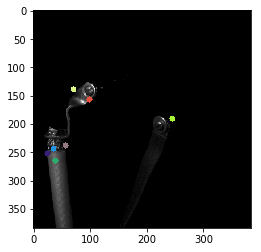

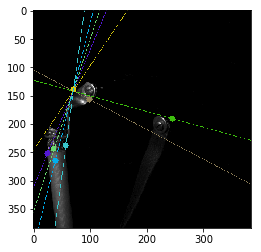

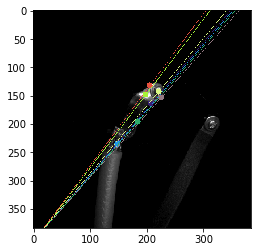

In [37]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])     
        cv2.line(img1, (x0,y0), (x1,y1), color,1)
        cv2.circle(img1,tuple(pt1),5,color,-1)
        cv2.circle(img2,tuple(pt2),5,color,-1)
        plt.imshow(img1)
        plt.show()
        plt.imshow(img2)
        plt.show()
    return img1,img2

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2).astype('float32'), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1.astype('int32'),pts2.astype('int32'))

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2).astype('float32'), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2.astype('int32'),pts1.astype('int32'))

plt.imshow(img5)
plt.show()
plt.imshow(img3)
plt.show()